# GRAB-NE DREADDS

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sys
import pingouin as pg
# change pkg_path variable to the directory storing the package
sys.path.insert(0, '../utility_code')
import fp_dat, fp_viz
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci


/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


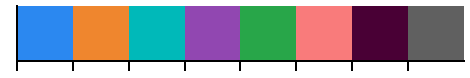

In [2]:
fp_viz.plot_style()
npg_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060']
fp_viz.set_palette(color_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060'], show = True)

In [3]:
df_grab = pd.read_csv(
    './data-clean/GRAB-NE_hM3Dq_FP.csv')


In [4]:
df_grab.loc[df_grab.standard_time.between(0,300, inclusive = 'left'), 'Block'] = 1

In [5]:
block_starts = np.arange(0, 3600, 600).tolist()

In [6]:
for block in block_starts:
    df_grab.loc[df_grab.standard_time.between(block,block + 600, inclusive = 'left'), 'Block'] = block

In [7]:
df_blocked = df_grab.groupby(['Group','Animal', 'Block'], as_index=False).mean()

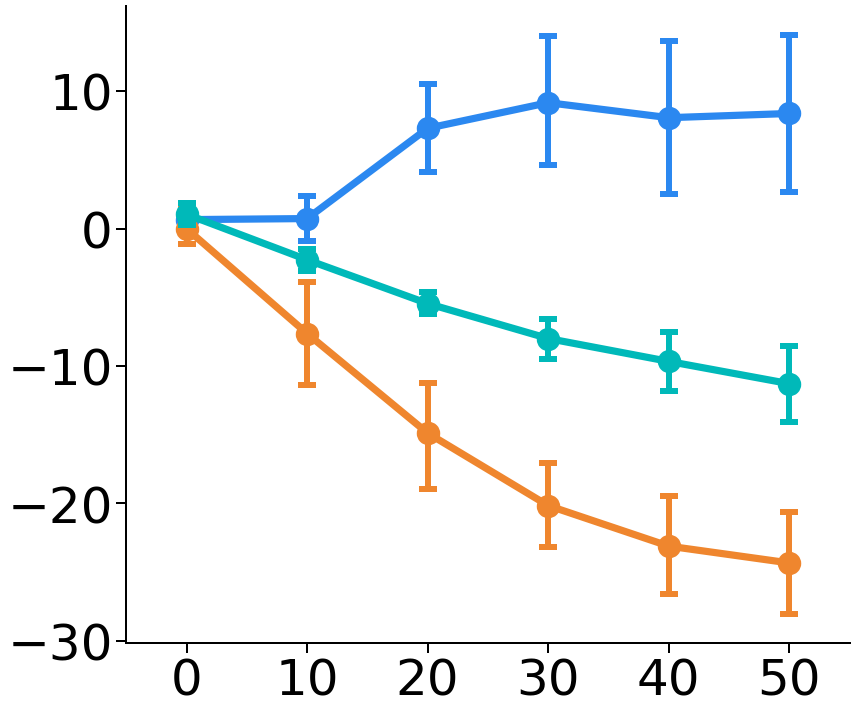

In [8]:
fp_viz.set_palette(color_pal=['#2b88f0', '#EF862E', '#00B9B9',
                   '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060'], show=False)

fig, ax = plt.subplots(figsize=(12, 10))

p = sns.pointplot(x='Block', y='base_norm', hue='Group',
                  ci=68, capsize=0.1,
                  data=df_blocked,  errwidth=6, scale=2)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['0', '10', '20', '30', '40', '50'], fontsize=50)

plt.yticks(fontsize=50)


plt.legend('')

plt.tight_layout()


In [9]:
# Change animal labels so that they only contain animal ID (i.e. no info about drug) so that RM anova can track which data are from same animals
df_blocked['Animal'] = df_blocked['Animal'].str[:2]


In [10]:
pg.rm_anova(df_blocked, dv='base_norm', within=['Block', 'Group'],
               subject='Animal')


/Users/jake/opt/anaconda3/lib/python3.8/site-packages/pingouin/distribution.py:459: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn("Epsilon values might be innaccurate in "


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Block,959.928161,5,20,191.985632,10.694916,4.137098e-05,0.024116,0.727797,0.227616
1,Group,6486.877742,2,8,3243.438871,20.782857,6.786322e-04,0.000970,0.838598,0.933358
2,Block * Group,2266.760709,10,40,226.676071,12.488132,1.854747e-09,0.016215,0.757401,0.120073
